In [1]:
import Chromatin_fixed_nucleosome
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.tri as tri

In [2]:
minFE=Chromatin_fixed_nucleosome.FE_fixed_nucl()

Fixed nucleosome calculations:

Total DNA length: 1000 nm
External force: 1.00 pN
DNA length absorbed per nucleosome: 60 nm

--------------
Negative nucleosomes
Binding energy: -40.0 kT
Writhe: -1.40
stretched DNA: 0.0 nm

--------------
Open nucleosomes
Binding energy: -25.0 kT
Writhe: 1.00
stretched DNA: 20.0 nm

--------------
Positive nucleosomes
Binding energy: -20.0 kT
Writhe: -0.40
stretched DNA: 0.0 nm



In [4]:
fe_vals=[]
Torq_Z=[]
sig_X,phi_Y=[],[]
sig_vals=np.linspace(-0.04,0.04,15)
for N in range(12):
    fe=[]
    for sig in sig_vals:
        minFE.sumOverPlectAndNuclDist(sig,N)
        fe.append(minFE.Emin)

    torq=np.gradient(np.array(fe))*minFE.h/(2*np.pi*minFE.L_DNA*np.gradient(sig_vals))

    for ix,sx in enumerate(sig_vals):
        sig_X.append(sx)
        phi_Y.append(N*minFE.l_nucl/minFE.L_DNA)
        Torq_Z.append(torq[ix])
        

Text(0.5, 1.0, '$\\tau$ (pN-nm)')

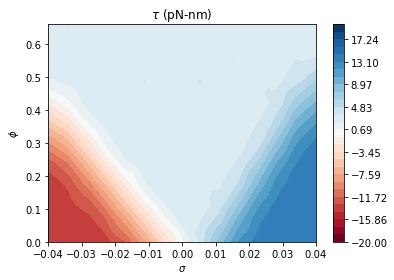

In [6]:

Xi,Yi=np.meshgrid(np.linspace(-0.04,0.04,40),np.linspace(0,0.66,20))

triang=tri.Triangulation(sig_X,phi_Y)

interp_torq=tri.LinearTriInterpolator(triang,Torq_Z)

plt.contourf(Xi, Yi, 4*interp_torq(Xi,Yi), cmap='RdBu', levels=np.linspace(-20,20,30))#,alpha=0.6)

plt.colorbar()
plt.xlabel('$\\sigma$')
plt.ylabel('$\\phi$')
plt.title('$\\tau$ (pN-nm)')
# plt.savefig('../plots/torq_compute.png',dpi=300)